# Applied math concepts for machine learning - Group 6 project

Students name in this Group:
- Gabriel Okazaki
- Julio Socher
- Kateryna Solonenko
- Mohit Sabharwal
- Riya Gupta
- Vaibhav Saini

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

## Data preprocessing

### Processing 'Sex' categorical column

In [5]:
df['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [6]:
df_dummies = pd.get_dummies(df['Sex'], dtype=int)
df_processed = pd.concat([df, df_dummies], axis=1)
del df_processed['Sex']
df_processed.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,F,M
0,40,ATA,140,289,0,Normal,172,N,0.0,Up,0,0,1
1,49,NAP,160,180,0,Normal,156,N,1.0,Flat,1,1,0
2,37,ATA,130,283,0,ST,98,N,0.0,Up,0,0,1
3,48,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,1,0
4,54,NAP,150,195,0,Normal,122,N,0.0,Up,0,0,1


### Processing 'ChestPainType' categorical column

In [7]:
df_processed['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
df_processed['ChestPainType']= LabelEncoder().fit_transform(df_processed['ChestPainType'])
df_processed.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,F,M
0,40,1,140,289,0,Normal,172,N,0.0,Up,0,0,1
1,49,2,160,180,0,Normal,156,N,1.0,Flat,1,1,0
2,37,1,130,283,0,ST,98,N,0.0,Up,0,0,1
3,48,0,138,214,0,Normal,108,Y,1.5,Flat,1,1,0
4,54,2,150,195,0,Normal,122,N,0.0,Up,0,0,1


### Processing 'RestingECG' categorical column

In [10]:
df_processed['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [11]:
df_processed['RestingECG']= LabelEncoder().fit_transform(df_processed['RestingECG'])
df_processed.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,F,M
0,40,1,140,289,0,1,172,N,0.0,Up,0,0,1
1,49,2,160,180,0,1,156,N,1.0,Flat,1,1,0
2,37,1,130,283,0,2,98,N,0.0,Up,0,0,1
3,48,0,138,214,0,1,108,Y,1.5,Flat,1,1,0
4,54,2,150,195,0,1,122,N,0.0,Up,0,0,1


### Processing 'ExerciseAngina' categorical column

In [12]:
df_processed['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [13]:
df_processed['ExerciseAngina'] = df_processed['ExerciseAngina'].replace({'Y':1, 'N':0})
df_processed.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,F,M
0,40,1,140,289,0,1,172,0,0.0,Up,0,0,1
1,49,2,160,180,0,1,156,0,1.0,Flat,1,1,0
2,37,1,130,283,0,2,98,0,0.0,Up,0,0,1
3,48,0,138,214,0,1,108,1,1.5,Flat,1,1,0
4,54,2,150,195,0,1,122,0,0.0,Up,0,0,1


### Processing 'ST_Slope' categorical column

In [14]:
df_processed['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [15]:
df_processed['ST_Slope']= LabelEncoder().fit_transform(df_processed['ST_Slope'])
df_processed.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,F,M
0,40,1,140,289,0,1,172,0,0.0,2,0,0,1
1,49,2,160,180,0,1,156,0,1.0,1,1,1,0
2,37,1,130,283,0,2,98,0,0.0,2,0,0,1
3,48,0,138,214,0,1,108,1,1.5,1,1,1,0
4,54,2,150,195,0,1,122,0,0.0,2,0,0,1


In [16]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   ChestPainType   918 non-null    int32  
 2   RestingBP       918 non-null    int64  
 3   Cholesterol     918 non-null    int64  
 4   FastingBS       918 non-null    int64  
 5   RestingECG      918 non-null    int32  
 6   MaxHR           918 non-null    int64  
 7   ExerciseAngina  918 non-null    int64  
 8   Oldpeak         918 non-null    float64
 9   ST_Slope        918 non-null    int32  
 10  HeartDisease    918 non-null    int64  
 11  F               918 non-null    int32  
 12  M               918 non-null    int32  
dtypes: float64(1), int32(5), int64(7)
memory usage: 75.4 KB


### Dealing with null values

In [17]:
from matplotlib import pyplot as plt
import seaborn as sns

<AxesSubplot:>

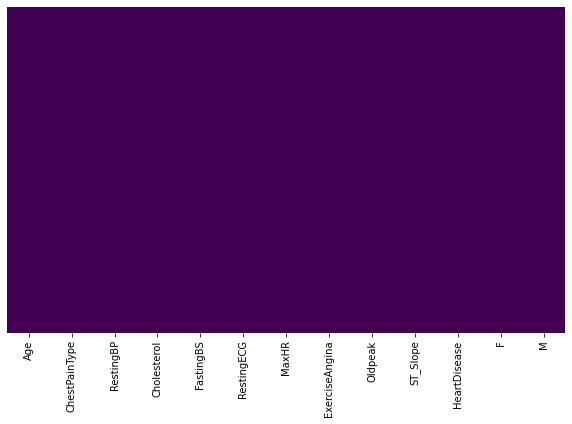

In [18]:
# Only `bmi` has Null values
plt.figure(figsize=(10,6))
sns.heatmap(df_processed.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Splitting dataset

In [19]:
X = df_processed.drop('HeartDisease', axis=1)
X.shape

(918, 12)

In [20]:
y = df_processed['HeartDisease']
y.shape

(918,)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [23]:
len(X_train)


642

In [24]:
len(X_test)

276

In [25]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
 model = SVC( C=1,
    kernel='linear',
    degree=1,
    gamma=1)

In [28]:
model.fit(X_train, y_train)

SVC(C=1, degree=1, gamma=1, kernel='linear')

In [29]:
model.score(X_test,y_test)

0.8731884057971014

In [ ]:
## Using Pram Grid Seacrh

In [31]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf','linear']} 

In [30]:
svc_model = SVC()

In [33]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3) 

In [34]:
grid.fit(X_train,y_train)

In [35]:
np.random.seed(1)
randomly_selected_features = np.random.choice(X_train_scaled.shape[1], size=10, replace=False)
X_train_reduced = X_train_scaled[:, randomly_selected_features]
X_test_reduced = X_test_scaled[:, randomly_selected_features]

model.fit(X_train_reduced, y_train)

y_pred_reduced = model.predict(X_test_reduced)
accuracy_reduced = accuracy_score(y_test, y_pred_reduced)
#report_reduced = classification_report(y_test, y_pred_reduced)

print(f"Model with Reduced Features - Accuracy: {accuracy_reduced}")


Model with Reduced Features - Accuracy: 0.8768115942028986
